In [1]:
import numpy as np 
import random
import pandas as pd 
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
import cv2
import shutil
from glob import glob

import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
dataset_dir ="Data"
fichier_gardenI= os.path.join('Data/Garden I/')
fichier_gardenII= os.path.join('Data/Garden II/')
fichier_gardenIII= os.path.join('Data/Garden III/')
fichier_gardenIV= os.path.join('Data/Garden IV/')


In [3]:
#nombre d'images contenues dans les fichiers
#récupération des images png, jpg, jpeg

#Garden I
images_gardenI = glob(os.path.join(fichier_gardenI, "*.png"))
images_gardenI.extend(glob(os.path.join(fichier_gardenI, "*.jpg")))
images_gardenI.extend(glob(os.path.join(fichier_gardenI, "*.jpeg")))

#GardenII
images_gardenII = glob(os.path.join(fichier_gardenII, "*.png"))
images_gardenII.extend(glob(os.path.join(fichier_gardenII, "*.jpg")))
images_gardenII.extend(glob(os.path.join(fichier_gardenII, "*.jpeg")))

#GardenIII
images_gardenIII = glob(os.path.join(fichier_gardenIII, "*.png"))
images_gardenIII.extend(glob(os.path.join(fichier_gardenIII, "*.jpg")))
images_gardenIII.extend(glob(os.path.join(fichier_gardenIII, "*.jpeg")))

#GardenIV
images_gardenIV = glob(os.path.join(fichier_gardenIV, "*.png"))
images_gardenIV.extend(glob(os.path.join(fichier_gardenIV, "*.jpg")))
images_gardenIV.extend(glob(os.path.join(fichier_gardenIV, "*.jpeg")))

In [4]:
#nombre d'image de chaque type de fracture
total_gardenI = len(images_gardenI)
total_gardenII = len(images_gardenII)
total_gardenIII = len(images_gardenIII)
total_gardenIV = len(images_gardenIV)

print("le nombre d'image de Type garden 1 est de : {}".format(total_gardenI))
print("le nombre d'image de Type garden 2 est de : {}".format(total_gardenII))
print("le nombre d'image de Type garden 3 est de : {}".format(total_gardenIII))
print("le nombre d'image de Type garden 4 est de : {}".format(total_gardenIV))

le nombre d'image de Type garden 1 est de : 24
le nombre d'image de Type garden 2 est de : 18
le nombre d'image de Type garden 3 est de : 21
le nombre d'image de Type garden 4 est de : 38


In [5]:
#transformation des images en matrice 
im_gardenI = cv2.imread(os.path.join(images_gardenI[9]))
im_gardenII = cv2.imread(os.path.join(images_gardenII[3]))
im_gardenIII = cv2.imread(os.path.join(images_gardenIII[14]))
im_gardenIV = cv2.imread(os.path.join(images_gardenIV[15]))



Text(0.5, 1.0, 'Garden 4')

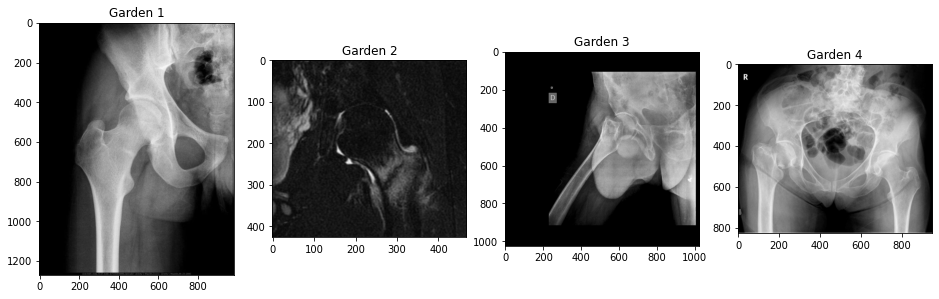

In [6]:
#Visualisation des images
f = plt.figure(figsize=(16, 16))
f.add_subplot(1, 4, 1)
plt.imshow(im_gardenI)
plt.title("Garden 1")
f.add_subplot(1,4, 2)
plt.imshow(im_gardenII)
plt.title("Garden 2")
f.add_subplot(1, 4, 3)
plt.imshow(im_gardenIII)
plt.title("Garden 3")
f.add_subplot(1, 4, 4)
plt.imshow(im_gardenIV)
plt.title("Garden 4")


In [7]:
#shape des images 
im_gardenI.shape

(1271, 979, 3)

In [8]:
im_gardenII.shape

(427, 468, 3)

In [9]:
im_gardenIII.shape

(1024, 1024, 3)

In [10]:
im_gardenIV.shape

(829, 951, 3)

In [11]:
GardenI = {'class': 'Garden I',
         'path': fichier_gardenI,
         'images': images_gardenI}

GardenII = {'class': 'Garden II',
         'path': fichier_gardenII,
         'images': images_gardenII}

GardenIII = {'class': 'Garden III',
         'path': fichier_gardenIII,
         'images': images_gardenIII}

GardenIV = {'class': 'Garden IV',
         'path': fichier_gardenIV,
         'images': images_gardenIV}

In [12]:
# Create Train-Test Directory
subdirs  = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['Garden I', 'Garden II', 'Garden III', 'Garden IV']
    for labeldir in labeldirs:
        newdir = subdir + labeldir
        os.makedirs(newdir, exist_ok=True)

In [13]:
#division de l'ensemble des données en train et test

# seed random number generator
random.seed(123)

test_ratio = 0.15

for cases in [GardenI, GardenII, GardenIII, GardenIV]:
    total_cas = len(cases['images']) #nombre total de cas
    nombre_selectionner = int(test_ratio * total_cas) #nombre d'image pour le test
    
    print(cases['class'], f'le nombre de données sélectionnées pour le test est : {nombre_selectionner}')
    
    list_of_random_files = random.sample(cases['images'], nombre_selectionner) #random files selected

    for files in list_of_random_files:
        shutil.copy2(files, 'test/' + cases['class'])

Garden I le nombre de données sélectionnées pour le test est : 3
Garden II le nombre de données sélectionnées pour le test est : 2
Garden III le nombre de données sélectionnées pour le test est : 3
Garden IV le nombre de données sélectionnées pour le test est : 5


In [14]:
#l'ensemble d'entraitement
for cases in [GardenI, GardenII, GardenIII, GardenIV]:
    image_test = os.listdir('test/' + cases['class']) 
    for images in cases['images']:
        if images.split('/')[-1] not in (image_test): #exclude test files from shutil.copy
            shutil.copy2(images, 'train/' + cases['class'])


In [15]:
total_train_GardenI = len(os.listdir('train/Garden I/'))
total_train_GardenII = len(os.listdir('train/Garden II/'))
total_train_GardenIII = len(os.listdir('train/Garden III/'))
total_train_GardenIV = len(os.listdir('train/Garden IV/'))

print("images d'entrainement Garden 1: {}".format(total_train_GardenI))
print("images d'entrainement Garden 2: {}".format(total_train_GardenII))
print("images d'entrainement Garden 3: {}".format(total_train_GardenIII))
print("images d'entrainement Garden 4: {}".format(total_train_GardenIV))

images d'entrainement Garden 1: 21
images d'entrainement Garden 2: 16
images d'entrainement Garden 3: 18
images d'entrainement Garden 4: 33


In [16]:
batch_size = 32
epochs = 10
#redimensionnement des pixels
IMG_HEIGHT = 224
IMG_WIDTH = 224


In [17]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generateur pour les données d'netrainnement
test_image_generator = ImageDataGenerator(rescale=1./255) # generateur pour les données de test

In [18]:
train_dir = os.path.join('train')
test_dir = os.path.join('test')

In [19]:
#melange des données
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 88 images belonging to 4 classes.


In [20]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 13 images belonging to 4 classes.


In [21]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [27]:
history = model.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=epochs
)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: -917824.9375 - accuracy: 0.1818 

/home/djeinaba/anaconda3/lib/python3.8/site-packages/keras/backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


3/3 [==============================] - 4s 1s/step - loss: -917824.9375 - accuracy: 0.1818 - val_loss: -1374025.5000 - val_accuracy: 0.1538
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: -1625281.1250 - accuracy: 0.1818 - val_loss: -2254120.0000 - val_accuracy: 0.1538
Epoch 3/10
3/3 [==============================] - 3s 981ms/step - loss: -2438938.5000 - accuracy: 0.1818 - val_loss: -3550437.5000 - val_accuracy: 0.1538
Epoch 4/10
3/3 [==============================] - 3s 993ms/step - loss: -4026284.2500 - accuracy: 0.1818 - val_loss: -5429207.5000 - val_accuracy: 0.1538
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: -6198342.0000 - accuracy: 0.1818 - val_loss: -8176696.0000 - val_accuracy: 0.1538
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: -9061583.0000 - accuracy: 0.1818 - val_loss: -12134150.0000 - val_accuracy: 0.1538
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: -13917408.0000 - accuracy: 0.1

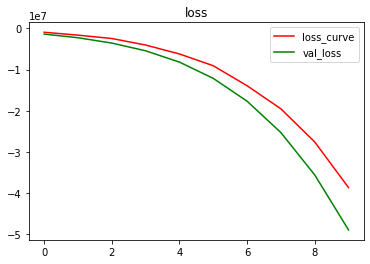

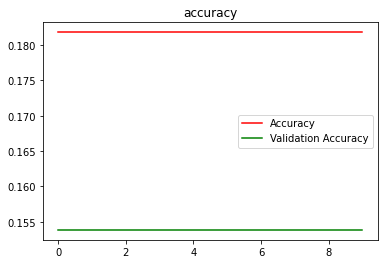

In [28]:
loss_curve = history.history["loss"]
accuracy =  history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy =history.history["val_accuracy"]

plt.plot(loss_curve, color= 'r', label='loss')
plt.plot(val_loss, color='g', label= 'val loss')
plt.title("loss")
plt.legend(["loss_curve","val_loss"])
plt.show()

plt.plot(accuracy, color= 'r', label='loss')
plt.plot(val_accuracy, color='g', label= 'val loss')
plt.title("accuracy")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

## II.Deuxiéme modèle: VGG

In [29]:
from tensorflow.keras.applications.vgg19 import VGG19
from keras.utils.vis_utils import plot_model 
modelVGG = VGG19()

In [30]:
modelVGG.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
plot_model(modelVGG, to_file='vgg.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [31]:
model_2 = Sequential()
model_2.add(modelVGG) # Ajout du modèle VGG16
model_2.add(Flatten()) 
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(1, activation='softmax'))
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model_2.fit(
    train_data_gen,
    validation_data=test_data_gen,
    epochs=10
)

Epoch 1/10


In [ ]:
loss_curve = history.history["loss"]
accuracy =  history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy =history.history["val_accuracy"]

plt.plot(loss_curve, color= 'r', label='loss')
plt.plot(val_loss, color='g', label= 'val loss')
plt.title("loss")
plt.legend(["loss_curve","val_loss"])
plt.show()

plt.plot(accuracy, color= 'r', label='loss')
plt.plot(val_accuracy, color='g', label= 'val loss')
plt.title("accuracy")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()